In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adp-book-data/mtcars.csv
/kaggle/input/adp-book-data/breast-cancer.csv
/kaggle/input/adp-book-data/CarPrice_Assignment.csv
/kaggle/input/adp-book-data/metalicity
/kaggle/input/adp-book-data/student-mat.csv
/kaggle/input/adp-book-data/bodyPerformance.csv
/kaggle/input/adp-book-data/19.csv
/kaggle/input/adp-book-data/Skyserver.csv
/kaggle/input/adp-book-data/credit_final.csv
/kaggle/input/adp-book-data/arima_data.csv
/kaggle/input/adp-book-data/diabetes_for_test.csv
/kaggle/input/adp-book-data/USArrests.csv
/kaggle/input/adp-book-data/cats.csv
/kaggle/input/adp-book-data/titanic.csv
/kaggle/input/adp-book-data/insurance.csv
/kaggle/input/adp-book-data/student-por.csv
/kaggle/input/adp-book-data/avocado.csv
/kaggle/input/adp-book-data/student_data.csv
/kaggle/input/adp-book-data/lot_quality.csv
/kaggle/input/adp-book-data/kc_house_data.csv
/kaggle/input/adp-book-data/Cars93.csv
/kaggle/input/adp-book-data/student_data_2.csv
/kaggle/input/adp-book-data/spam.csv
/kaggle/input/

# ADP 모의고사 1
### 머신러닝(50점)
##### 데이터 : 학생 성적에 관한 소규모 데이터
- (1) 시각화 포함 탐색적 자료 분석을 시행하시오
- (2) 결측치를 식별.예측하는 두 가지 방법을 쓰고, 이를 선택한 이유를 설명
- (3) 범주형 변수 인코딩이 필요한 경우를  식별하고, 변환을 적용하시오. 이를 선택한 이유를 설명하시오.
- (4) 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용하시오. 이를 선택한 이유를 설명하시오.
- (5) svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고 학생 성적 예측 분석에 적합한 알고리즘인지 설명하시오.
- (6) 세가지 모델 모두 모델링 해보고 가장 적합한 알고리즘을 선택. 이를 선택한 이유와 모델의 한계점, 보완 가능한 부분을 설명하고, 현업에서 주의할 점 등에 대해 기술하시오

In [2]:
import pandas as pd
import numpy as np
import os
os.listdir("/kaggle/input")

# 데이터 불러오기
data = pd.read_csv("/kaggle/input/adp-book-data/student_data.csv")

- (1) 시각화 포함 탐색적 자료 분석을 시행하시오

In [3]:
print(data.head())
print(data.info())
print(data.describe())


  school sex paid activities  famrel  freetime  goout  Dalc  Walc  health  \
0     GP   F   no         no     4.0       3.0    4.0   1.0   1.0     3.0   
1     GP   F   no         no     5.0       3.0    3.0   1.0   1.0     3.0   
2     GP   F  yes         no     4.0       3.0    2.0   2.0   3.0     3.0   
3     GP   F  yes        yes     3.0       2.0    2.0   1.0   1.0     5.0   
4     GP   F  yes         no     4.0       3.0    2.0   1.0   2.0     5.0   

   absences  grade  G1  G2  
0       6.0      6   5   6  
1       4.0      5   5   5  
2      10.0      8   7   8  
3       2.0     15  15  14  
4       4.0      9   6  10  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel 

In [4]:
# 연속형 변수
numerical_feats = data.dtypes[data.dtypes != "object"].index
# 범주형 변수
categorical_feats = data.dtypes[data.dtypes == "object"].index

print("Number of Numerical features: ", len(numerical_feats))
print(data[numerical_feats].columns)
print("*"*80)
print("Number of Categorical features: ", len(categorical_feats))
print(data[categorical_feats].columns)

Number of Numerical features:  10
Index(['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'grade', 'G1', 'G2'],
      dtype='object')
********************************************************************************
Number of Categorical features:  4
Index(['school', 'sex', 'paid', 'activities'], dtype='object')


<BarContainer object of 19 artists>

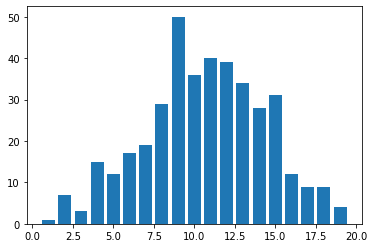

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.bar(data['grade'].value_counts().index, data['grade'].value_counts().values)

<AxesSubplot:title={'center':'Correlation of Numeric Features with grade'}>

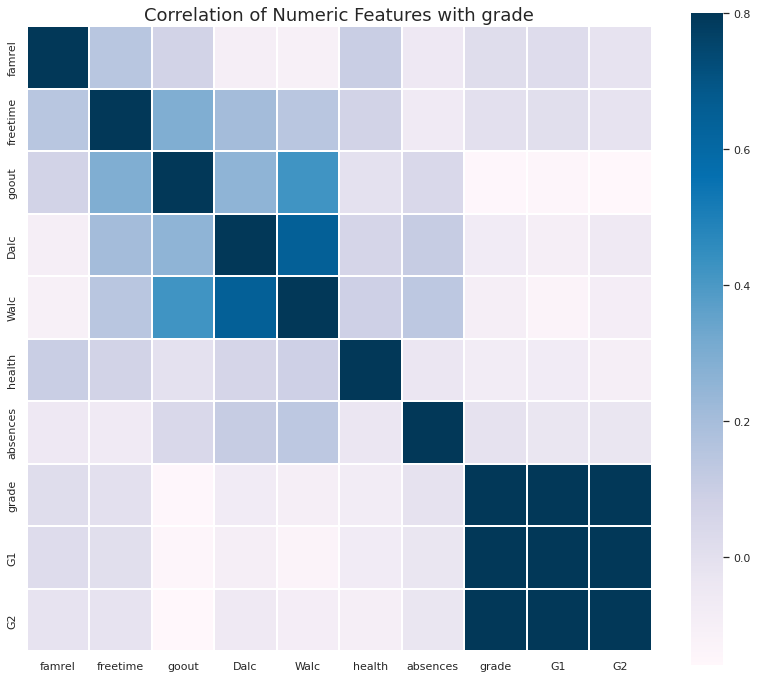

In [6]:

# Correlation Heat  Map
corr_data = data[['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'grade', 'G1', 'G2']]

colormap = plt.cm.PuBu
sns.set(font_scale=1.0)

f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features with grade',y=1,size=18)
sns.heatmap(corr_data.corr(),square = True, linewidths = 0.1,
            cmap = colormap, linecolor = "white", vmax=0.8)

#### 변수 해석 : 결측치 존재 여부, 데이터 타입설명, 종속변수 분포 설명, 종속변수와 독립변수의 상관관계 설명

- (2) 결측치를 식별.예측하는 두 가지 방법을 쓰고, 이를 선택한 이유를 설명

In [7]:
# 컬럼별 결측치의 개수
print(data.isna().sum())

# 결측치 확인
data[data.isna().any(axis = 1)]

school        0
sex           0
paid          0
activities    0
famrel        1
freetime      2
goout         3
Dalc          4
Walc          2
health        4
absences      3
grade         0
G1            0
G2            0
dtype: int64


,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
9,GP,M,yes,yes,5.0,5.0,NaN,1.0,1.0,5.0,0.0,15,14,15
14,GP,M,no,no,NaN,5.0,2.0,1.0,1.0,3.0,0.0,15,14,16
15,GP,F,no,no,4.0,4.0,4.0,1.0,2.0,2.0,NaN,14,14,14
25,GP,F,yes,no,1.0,2.0,2.0,1.0,NaN,5.0,14.0,8,6,9
39,GP,F,yes,yes,4.0,3.0,1.0,1.0,1.0,NaN,8.0,13,14,13
40,GP,F,no,yes,3.0,3.0,NaN,1.0,2.0,3.0,25.0,9,7,10
49,GP,F,no,yes,4.0,4.0,4.0,1.0,1.0,NaN,2.0,7,7,7
61,GP,F,no,yes,5.0,5.0,5.0,NaN,5.0,5.0,6.0,10,10,8
71,GP,M,no,no,3.0,3.0,3.0,NaN,1.0,3.0,0.0,10,10,10
82,GP,F,yes,no,4.0,4.0,4.0,1.0,1.0,5.0,NaN,6,7,6


- 결측치 식별 및 예측 방법
1. 단순 대치 : 평균, 중앙값 등을 사용하여 결측치를 대체함 (범주형이라면 최빈값 사용)
2. knn 및 mice 등 방법을 통한 예측 : 결측치가 없는 컬럼들의 knn 알고리즘을 통해 결측치가 있는 변수를 대체가능    
=> 위 데이터는 한 행이 전부 결측인 경우는 존재하지 않으므로 삭제보다는 대체하는 것으로 처리.
수치형 변수만 결측치가 있으므로 KNN 기법사용하여 대체

In [8]:
from sklearn.impute import KNNImputer

# 결측치가 있는 수치형 데이터만을 추출
KNN_data = data[['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']]

# imputer 생성
imputer = KNNImputer()
df_filled = imputer.fit_transform(KNN_data)
df_filled = pd.DataFrame(df_filled, columns = KNN_data.columns)
data[KNN_data.columns] = df_filled

# 결측치 확인
data.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
grade         0
G1            0
G2            0
dtype: int64

- (3) 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 이를 선택한 이유를 설명하시오.
- => 범주형 변수는 school, sex, paid, acitivies가 존재하며, 모두 이산형 변수이므로 boolean 타입으로 변경하여 knn을 이용한 결측 처리와 머신러닝에서 변수 사용가능하도록 함.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      395 non-null    float64
 5   freetime    395 non-null    float64
 6   goout       395 non-null    float64
 7   Dalc        395 non-null    float64
 8   Walc        395 non-null    float64
 9   health      395 non-null    float64
 10  absences    395 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB


In [10]:
print(data.school.value_counts())
print(data.sex.value_counts())
print(data.paid.value_counts())
print(data.activities.value_counts())

GP    349
MS     46
Name: school, dtype: int64
F    208
M    187
Name: sex, dtype: int64
no     214
yes    181
Name: paid, dtype: int64
yes    201
no     194
Name: activities, dtype: int64


In [11]:
df = pd.get_dummies(data = data, columns = ['school', 'sex', 'paid', 'activities'], drop_first = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   famrel          395 non-null    float64
 1   freetime        395 non-null    float64
 2   goout           395 non-null    float64
 3   Dalc            395 non-null    float64
 4   Walc            395 non-null    float64
 5   health          395 non-null    float64
 6   absences        395 non-null    float64
 7   grade           395 non-null    int64  
 8   G1              395 non-null    int64  
 9   G2              395 non-null    int64  
 10  school_MS       395 non-null    uint8  
 11  sex_M           395 non-null    uint8  
 12  paid_yes        395 non-null    uint8  
 13  activities_yes  395 non-null    uint8  
dtypes: float64(7), int64(3), uint8(4)
memory usage: 32.5 KB


- (4) 데이터분할방법 2가지를 쓰고 적절한 데이터 분할을 적용하시오. 이를 선택한 이유도
- => 1. 랜덤 분할 방법
-    2. 층화 추출 기법

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('grade', axis = 1)
y = df['grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2022)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(276, 13)
(119, 13)
(276,)
(119,)


해당 데이터는 종속변수가 연속형이므로, 회귀분석을 사용한다. 그러므로 층화추출기법이 아닌 랜덤샘플링을 통한 분할을 사용하여, 7:3비율로 분할함.

- (5) svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고 학생성적 예측 분석에 적합한 알고리즘인지 설명하시오.
-  공통점 1) 회귀분석과 분류분석을 모두 할 수 있는 분석 알고리즘이다.
-        2) 모두 범주형 변수를 독립변수로 사용할 수 없어 변환이 필요하다.
-        3) 과대 적합 과소적합을 피하기 위한 매개변수의 설정이 필요하다.
-        4) 회귀분석에서 다중공선성의 문제를 해결할 수 잇다.
- 해당 데이터는 종속변수의 값이 연속형이므로 회귀분석이 적합하다. 회귀분석에서 다중공선성 문제를 해결하는 것이 중요한데 svm은 커널트릭을 통해, xgboost와 randomforest는 트리모델을 통해 다중공선성을 해결할 수 있다. 그러므로 회귀분석을 지원하는 위 3가지의 알고리즘은 연속형 변수를 예측하기에 적합하다.

- (6) 세 가지 모델 모두 모델링해보고 가장 적합한 알고리즘을 선택하시오. 이를 선택한 이유와 모델의 한계점, 보완가능한 부분을 설명하고, 현업에서 주의할 점 등에 대해 기술하시오.

In [17]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),
                             columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test),
                             columns = X_test.columns)

In [20]:
# SVM
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'C':[0.1, 1, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 1, 10]}
]
grid_svm = GridSearchCV(SVR(), param_grid = param_grid, cv = 5)
grid_svm.fit(X_train_scaled, y_train)
result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by = 'mean_test_score', ascending = False)

,C,gamma,mean_test_score
15,100.0,0.001,0.961052
11,10.0,0.010,0.957154
16,100.0,0.010,0.947247
10,10.0,0.001,0.941819
6,1.0,0.010,0.921503
12,10.0,0.100,0.862825
17,100.0,0.100,0.858976
7,1.0,0.100,0.785790
5,1.0,0.001,0.303476
2,0.1,0.100,0.283738


In [22]:
svr = SVR(C = 100, gamma = 0.001)
svr.fit(X_train_scaled, y_train)

print('R2', svr.score(X_test_scaled, y_test))
print('RMSE', np.sqrt(mean_squared_error(y_test, svr.predict(X_test_scaled))))

R2 0.9553904004710411
RMSE 0.7935288755905411


In [24]:
rf_grid = [
    { 'max_depth': [2,4,6,8,10], 'min_samples_split': [2, 4, 6, 8, 10]}
]

rf  = GridSearchCV(RandomForestRegressor(n_estimators=100), param_grid =rf_grid, cv = 5)
rf.fit(X_train, y_train)

print(rf.best_params_)
print("R2 : ", rf.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test,rf.predict(X_test))))

{'max_depth': 6, 'min_samples_split': 2}
R2 :  0.9527661983947228
RMSE: 0.8165354099871794


In [18]:
xgb_grid = [
    { 'max_depth': [2,4,6,8,10]}
]

xgb = GridSearchCV(XGBRegressor(n_estimators=1000), param_grid =xgb_grid, cv = 5)
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

print("R2 : ", xgb.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test,xgb.predict(X_test))))

R2 :  0.9563313596039156
RMSE: 0.7851152405080402


In [ ]:
from xgboost import plot_importance
plot_importance(xgb)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

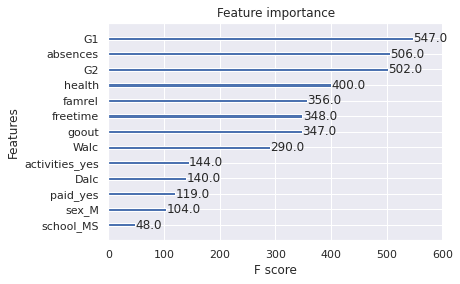

In [21]:
from xgboost import plot_importance
plot_importance(xgb.best_estimator_)

## 해석

- 가장적합한 알고리즘 선택 : XGBoost 모델이 가장 정확도가 높고 RMSE값이 낮으므로 예측 분석력이 좋다. 
- XGBoost 분석결과 가족친밀도인 farmrel변수가 최종 성적에 영향을 많이 주는것으로 보였다. 
- 한계점 : G1,G2가 grade와의 상관성이 매우 높은 변수이므로 좋은 결과가 나오지만, 해당 변수를 제외하고 분석하였을 때에는 정확도가 매우 낮게 나온다. 주 변수로 G1, G2를 사용할 수는 있지만 이 또한 성적이기 때문에 성적에 영향을 미치는 변수를 찾기에는 어려워보인다. 성적과 밀접 관련이 있는 추가적인 변수를 추가한다면, 모델의 정확성 뿐만이 아니라 의미있는 분석이 될 것이라 생각한다. 

### 통계분석 (50점)
##### 데이터 : 보스턴 집값 데이터세트

In [3]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 1.7 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=95adc1af2ce39372697c32d93ab2bc39d563abef41522139b00f4ac2e6987871
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [6]:
import pandas as pd
import numpy as np
import os
import mglearn

# 데이터 불러오기
X, y = mglearn.datasets.load_extended_boston()

# 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

# R2
print(lr.score(X_test, y_test))
print(np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))

0.6158858584078737
5.59265723707865


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [14]:
from sklearn.model_selection import GridSearchCV

alpha = np.arange(0, 1.1, 0.1)

ridge = Ridge() # normalize = True
param_grid = {'alpha' : alpha}
ridge_model = GridSearchCV(ridge, param_grid)
ridge_model.fit(X_train, y_train)

print(ridge_model.best_params_)
print(ridge_model.score(X_test, y_test))
print(np.sqrt(mean_squared_error(y_test, ridge_model.predict(X_test))))

{'alpha': 0.1}
0.7463824108919248
4.544412437236821


In [18]:
alpha = np.arange(0, 1.1, 0.1)

lasso = Lasso() # normalize = True
param_grid = {'alpha' : alpha}
lasso_model = GridSearchCV(lasso, param_grid)
lasso_model.fit(X_train, y_train)

print(lasso_model.best_params_)
print(lasso_model.best_extimaor_.score(X_test, y_test))
print(np.sqrt(mean_squared_error(y_test, lasso_model.best_extimaor_.predict(X_test))))

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.496e+02, tolerance: 2.838e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

{'alpha': 0.0}


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:926: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.040e+03, tolerance: 3.440e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  

AttributeError: 'GridSearchCV' object has no attribute 'best_extimaor_'